In [ ]:
WEEK-5

In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Indian_kids_screen_time.csv")
df.head(7)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural


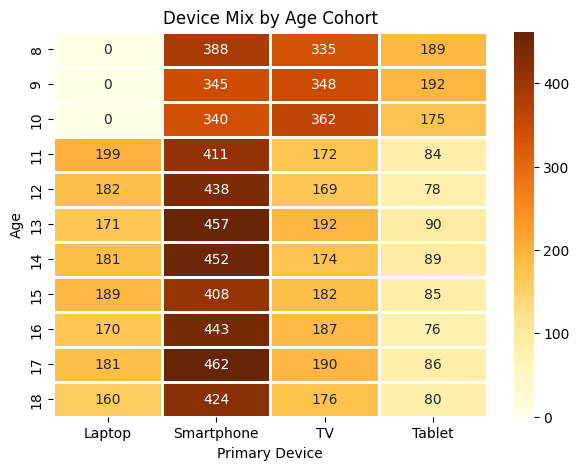

In [4]:
#  Heatmap - Age_group × Primary_Device
ct = pd.crosstab(df["Age"], df["Primary_Device"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlOrBr",     
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Device Mix by Age Cohort")
plt.xlabel("Primary Device")
plt.ylabel("Age")
plt.show()


In [ ]:
Insights
Across all cohorts, smartphones are the most used primary device.
TVs are the second most common, while laptops and tablets show lower usage.
This highlights that smartphones are central to daily digital activity.


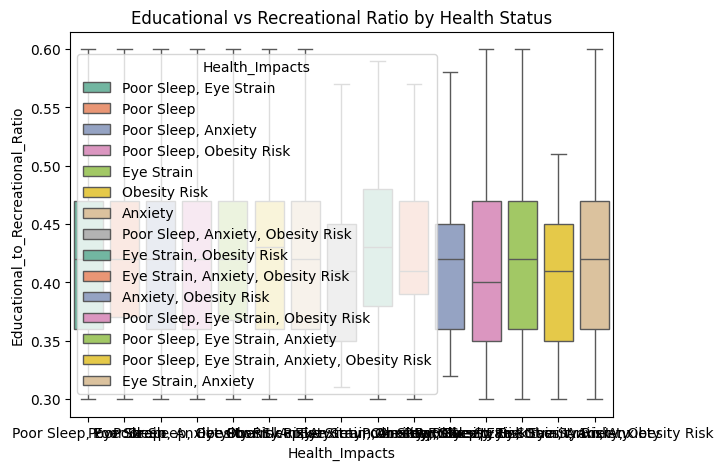

In [9]:
# Boxplot - Health_Status vs Edu/Recreational Ratio
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Health_Impacts", 
    y="Educational_to_Recreational_Ratio", 
    hue="Health_Impacts",        
    data=df, 
    palette="Set2",               
)
plt.title("Educational vs Recreational Ratio by Health Status")
plt.show()

In [ ]:
Insights
Across all health groups, the educational-to-recreational ratio remains around 0.4–0.45.
Users with no health impacts show a slightly higher ratio.
This implies most screen time is recreational, regardless of health status.

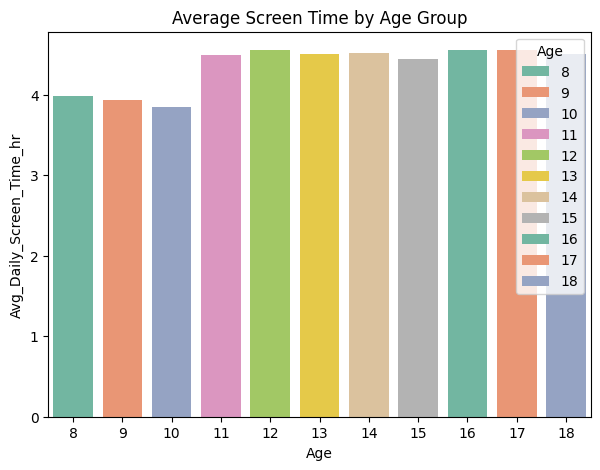

In [11]:
# countplot-Average Screen Time by Age Group
plt.figure(figsize=(7,5))
sns.barplot(
    x="Age", 
    y="Avg_Daily_Screen_Time_hr", 
    data=df, 
    palette="Set2", 
    hue ="Age",
    errorbar=None
)

plt.title("Average Screen Time by Age Group")
plt.show()


In [ ]:
Insights
Teenagers and Late Teens spend the most screen time (over 4 hours/day).
Pre-Teens have slightly lower screen time.
This suggests that screen engagement increases with age.

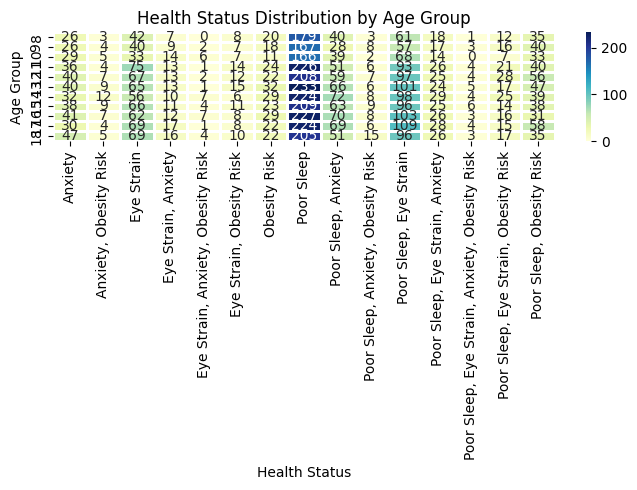

In [13]:
# Heatmap - Age_group × Health_Status
ct = pd.crosstab(df["Age"], df["Health_Impacts"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Health Status Distribution by Age Group")
plt.xlabel("Health Status")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

In [ ]:
Insights
Pre-Teens have the highest counts across all health categories, especially in the ‘No Health Impacts’ group.
Teenagers show higher numbers in ‘Mental’ health issues, suggesting growing stress or screen-related effects.
Late Teens have the lowest overall counts, likely due to a smaller sample size.
Overall, mental and combined health impacts are more frequent among younger users

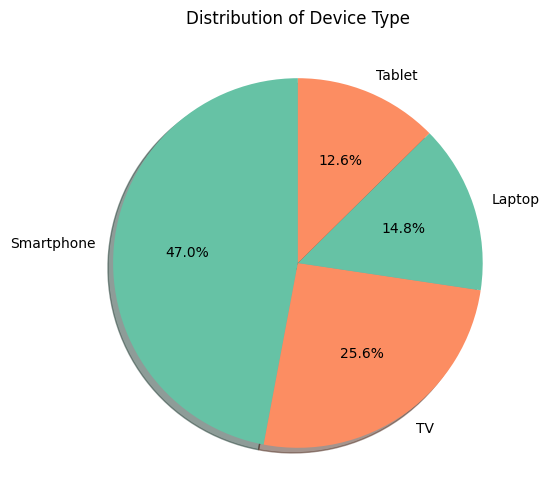

In [14]:
# Pie chart-Distribution of Device Type
plt.figure(figsize=(6,6))
df['Primary_Device'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=["#66c2a5", "#fc8d62"] 
)

plt.ylabel("")
plt.title("Distribution of Device Type")
plt.show()

In [ ]:
Insights
Around 74% of users use portable devices (smartphone, tablets, laptops).
Only 26% use fixed devices (TV).
This shows the increasing preference for on-the-go screen usage among younger users.


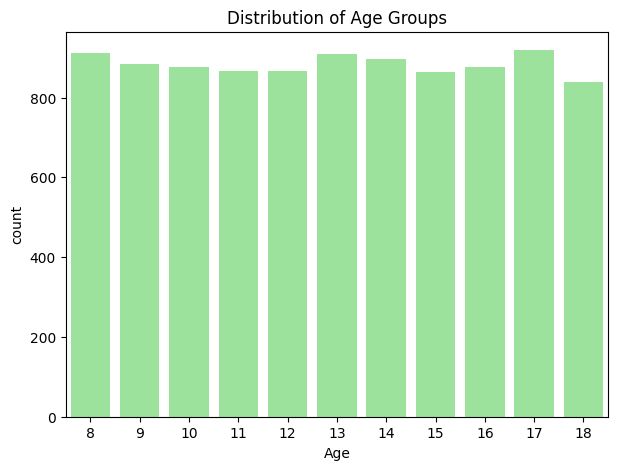

In [16]:
# Countplot - Age_group distribution
plt.figure(figsize=(7,5))
sns.countplot(x="Age", data=df, color="lightgreen")  
plt.title("Distribution of Age Groups")
plt.show()


In [ ]:
Insights
Most participants belong to the Pre-Teens group, followed by Teenagers.
Late Teens form the smallest portion.
This indicates the dataset is dominated by younger users, which may influence screen time patterns.

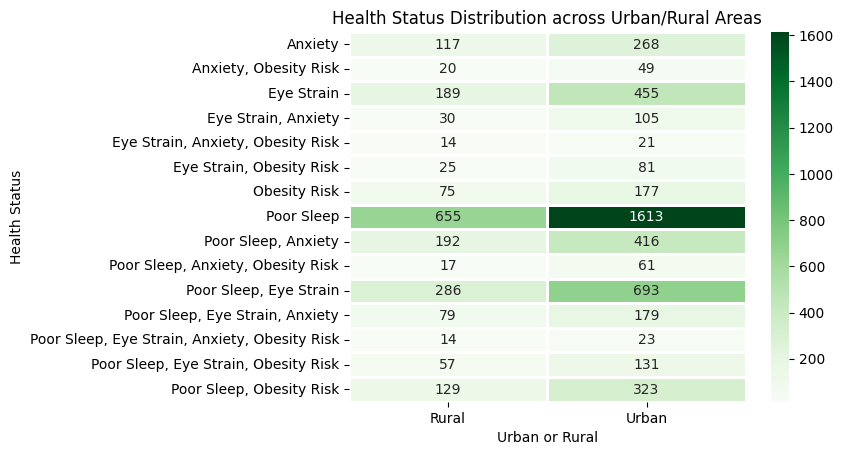

In [17]:
# Heatmap-Health Status Distribution 
ct = pd.crosstab(df["Health_Impacts"], df["Urban_or_Rural"])
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=1, linecolor="white")
plt.title("Health Status Distribution across Urban/Rural Areas")
plt.xlabel("Urban or Rural")
plt.ylabel("Health Status")
plt.show()

In [ ]:
Insights
Urban users show higher counts in all health categories compared to rural users.
Mental and combined (Mental, Physical) health issues are more prevalent in urban areas.
A larger number of urban users report no health impacts, indicating a mixed health trend

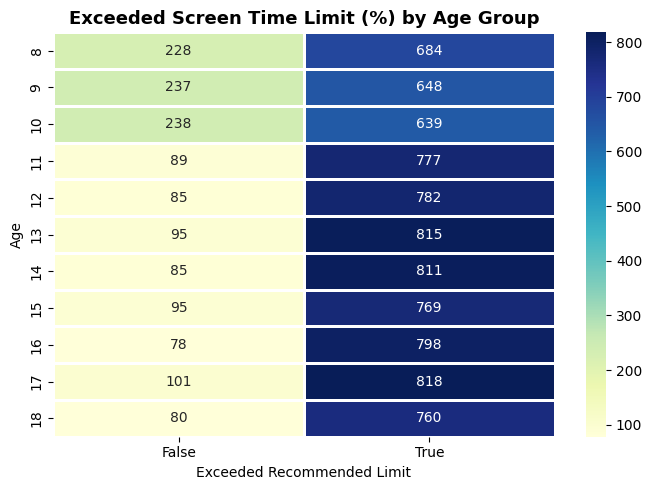

In [18]:
# Heatmap - Exceeded Limit % by Age Group
ct = pd.crosstab(df["Age"], df[ "Exceeded_Recommended_Limit"])

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,         
    fmt="d",            
    cmap="YlGnBu",      
    linewidths=1,       
    linecolor="white",  
    cbar=True           
)

plt.title("Exceeded Screen Time Limit (%) by Age Group", fontsize=13, weight='bold')
plt.xlabel("Exceeded Recommended Limit")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

In [ ]:
Insights
Around 80–90% of users exceed the recommended daily screen time limit.
Teenagers are the most likely to exceed it.
This highlights a consistent overuse of screens across all age cohorts.

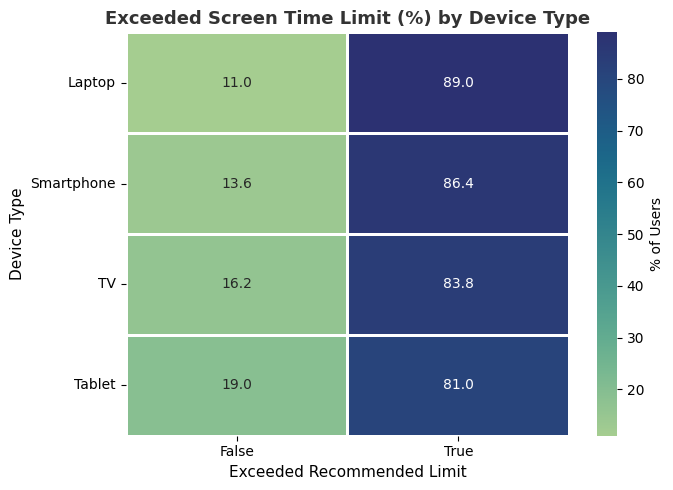

In [19]:
# Heatmap - % of Exceeded Screen Time Limit by Device Type

ct = pd.crosstab(
    df["Primary_Device"],
    df["Exceeded_Recommended_Limit"],
    normalize='index'
) * 100

plt.figure(figsize=(7,5))
sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap="crest",        
    linewidths=1,
    linecolor="white",
    cbar_kws={'label': '% of Users'}
)

plt.title("Exceeded Screen Time Limit (%) by Device Type", fontsize=13, weight='bold', color="#333333")
plt.xlabel("Exceeded Recommended Limit", fontsize=11)
plt.ylabel("Device Type", fontsize=11)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
Insights
Portable devices (e.g., smartphones, tablets, laptops) show the highest screen-time exceedance — about 86.4% of users go beyond the recommended limit.
Fixed devices (e.g. TVs) have a slightly lower exceedance rate (~84%), but it’s still very high.
This suggests that mobility and accessibility of portable devices lead to longer, uncontrolled usage patterns.

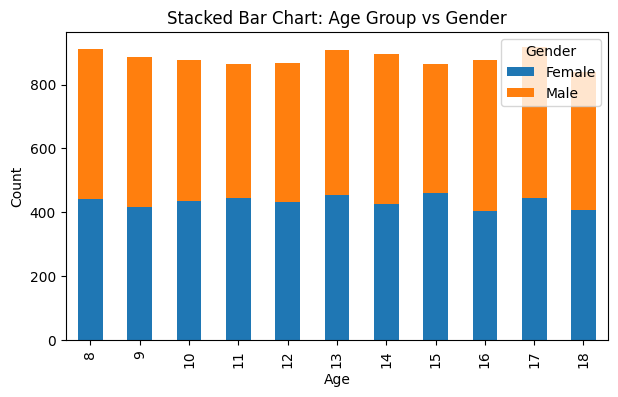

In [20]:
# STACKED BAR CHART  – Age group vs Gender
age_gender = pd.crosstab(df['Age'], df['Gender'])
age_gender.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("Stacked Bar Chart: Age Group vs Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

In [ ]:
Insights
Pre-teens represent the largest user group, followed by teenagers and late teens.
Both males and females are well represented, showing that screen engagement is high across genders.
There’s no sharp gender difference, suggesting that screen usage habits are becoming uniform across groups.

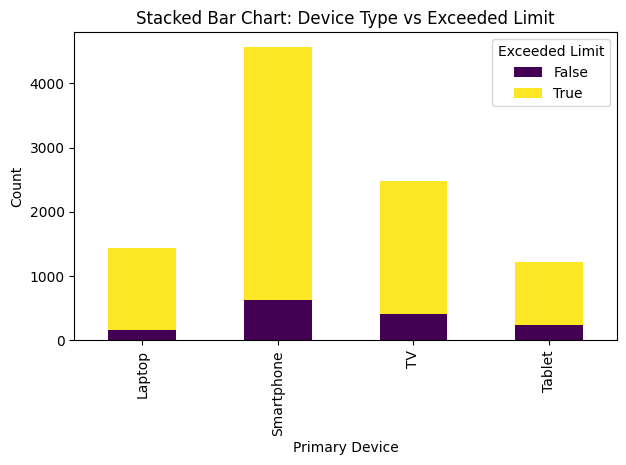

In [21]:
# STACKED BAR CHART  – Device Type vs Exceeded Recommended Limit
device_limit = pd.crosstab(df['Primary_Device'], df['Exceeded_Recommended_Limit'])
device_limit.plot(kind='bar', stacked=True, figsize=(7,4), colormap='viridis')
plt.title("Stacked Bar Chart: Device Type vs Exceeded Limit")
plt.xlabel("Primary Device")
plt.ylabel("Count")
plt.legend(title="Exceeded Limit")
plt.show()


In [ ]:
Insights
Both fixed and portable device users exceed screen time limits, but portable users dominate overall.
The stacked proportions highlight that a majority of portable users exceed the limit.
This supports the heatmap finding — portability = higher overuse risk.

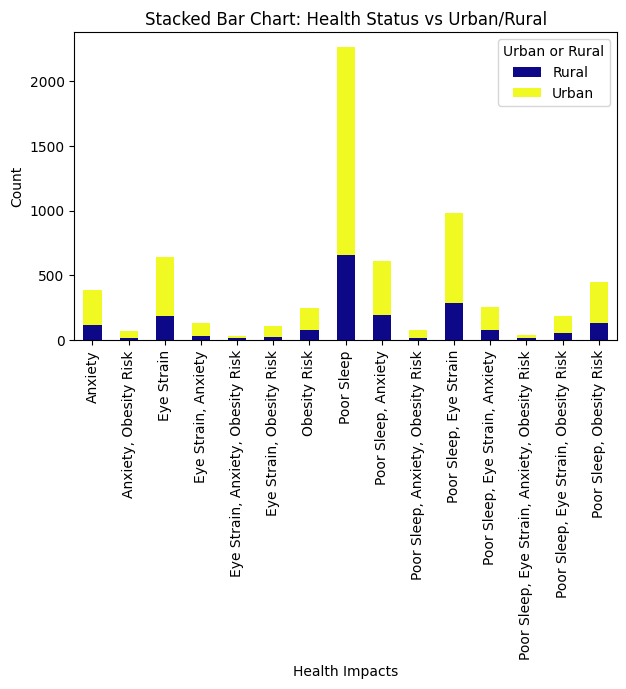

In [23]:
# STACKED BAR CHART – Health Status vs Urban_or_Rural
health_urban = pd.crosstab(df['Health_Impacts'], df['Urban_or_Rural'])
health_urban.plot(kind='bar', stacked=True, figsize=(7,4), colormap='plasma')
plt.title("Stacked Bar Chart: Health Status vs Urban/Rural")
plt.xlabel("Health Impacts")
plt.ylabel("Count")
plt.legend(title="Urban or Rural")
plt.show()